## Student Name: DEKKA SRIDHAR                           
## UID: 20BCS6174
## Branch: BE-CSE               
## Section/Group: AIML-1B
## Semester: 4th           
## Date of Performance:21/03/2022
## Subject Name: Machine Learning Lab
## -------------------------------------------------------------

## Logistic Regression on iris Dataset

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  

## Showing present Directory 

In [2]:
%pwd

'C:\\Users\\Hp\\OneDrive\\Semister 4\\Machine_learning_codes'

## Importing the dataset

In [3]:
df=pd.read_csv('iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.tail()

,sepallength,sepalwidth,petallength,petalwidth,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
import math
sepallength_median=math.floor(df.sepallength.median())
sepallength_median 

5

In [7]:
df.sepallength=df.sepallength.fillna(sepallength_median)
df.sepallength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallength, Length: 150, dtype: float64

In [8]:
df

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
df.shape

(150, 5)

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df[['sepallength','sepalwidth','petallength','petalwidth']],df.variety,test_size=0.25)

In [12]:
x_test

,sepallength,sepalwidth,petallength,petalwidth
97,6.2,2.9,4.3,1.3
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
28,5.2,3.4,1.4,0.2
76,6.8,2.8,4.8,1.4
141,6.9,3.1,5.1,2.3
31,5.4,3.4,1.5,0.4
77,6.7,3.0,5.0,1.7
56,6.3,3.3,4.7,1.6
14,5.8,4.0,1.2,0.2


In [13]:
y_test

97     Versicolor
75     Versicolor
43         Setosa
28         Setosa
76     Versicolor
141     Virginica
31         Setosa
77     Versicolor
56     Versicolor
14         Setosa
133     Virginica
111     Virginica
82     Versicolor
142     Virginica
8          Setosa
120     Virginica
88     Versicolor
42         Setosa
58     Versicolor
137     Virginica
113     Virginica
6          Setosa
47         Setosa
84     Versicolor
138     Virginica
89     Versicolor
41         Setosa
145     Virginica
61     Versicolor
13         Setosa
125     Virginica
119     Virginica
5          Setosa
114     Virginica
143     Virginica
104     Virginica
12         Setosa
10         Setosa
Name: variety, dtype: object

In [14]:
x_train

,sepallength,sepalwidth,petallength,petalwidth
116,6.5,3.0,5.5,1.8
149,5.9,3.0,5.1,1.8
134,6.1,2.6,5.6,1.4
27,5.2,3.5,1.5,0.2
32,5.2,4.1,1.5,0.1
...,...,...,...,...
20,5.4,3.4,1.7,0.2
146,6.3,2.5,5.0,1.9
100,6.3,3.3,6.0,2.5
117,7.7,3.8,6.7,2.2


In [15]:
y_train

116     Virginica
149     Virginica
134     Virginica
27         Setosa
32         Setosa
          ...    
20         Setosa
146     Virginica
100     Virginica
117     Virginica
70     Versicolor
Name: variety, Length: 112, dtype: object

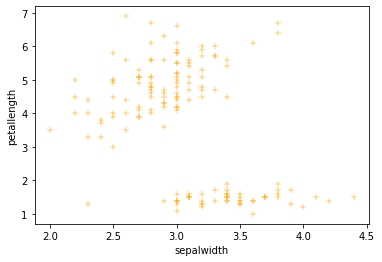

In [16]:
import seaborn as sns
sns.scatterplot(x='sepalwidth',y='petallength',data=df,color='orange',marker='+')
plt.show() 

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
x_train

array([[ 0.77470517, -0.14001167,  0.97862687,  0.81024551],
       [ 0.05264987, -0.14001167,  0.75216776,  0.81024551],
       [ 0.29333497, -1.0234656 ,  1.03524165,  0.28110559],
       [-0.78974799,  0.96430574, -1.28596423, -1.3063142 ],
       [-0.78974799,  2.28948663, -1.28596423, -1.43859918],
       [-1.03043309, -2.34864649, -0.15366868, -0.24803434],
       [ 0.65436262,  0.30171529,  0.86539731,  1.47167042],
       [ 2.21881577, -0.14001167,  1.31831553,  1.47167042],
       [ 0.65436262, -0.58173863,  1.03524165,  1.20710046],
       [ 1.37641792,  0.30171529,  0.52570865,  0.28110559],
       [ 2.21881577, -1.0234656 ,  1.77123375,  1.47167042],
       [ 1.01539027,  0.52257877,  1.09185642,  1.20710046],
       [ 1.13573282, -0.14001167,  0.97862687,  1.20710046],
       [-0.18803524, -0.36087515,  0.24263476,  0.1488206 ],
       [-0.18803524,  2.95207707, -1.28596423, -1.04174423],
       [ 1.25607537,  0.08085181,  0.92201209,  1.20710046],
       [-0.30837779, -0.

In [31]:
x_test

array([[ 0.41367752, -0.36087515,  0.29924954,  0.1488206 ],
       [ 0.89504772, -0.14001167,  0.35586432,  0.28110559],
       [-1.03043309,  0.96430574, -1.22934945, -0.77717427],
       [-0.78974799,  0.74344226, -1.34257901, -1.3063142 ],
       [ 1.13573282, -0.58173863,  0.58232343,  0.28110559],
       [ 1.25607537,  0.08085181,  0.75216776,  1.47167042],
       [-0.54906289,  0.74344226, -1.28596423, -1.04174423],
       [ 1.01539027, -0.14001167,  0.69555298,  0.67796053],
       [ 0.53402007,  0.52257877,  0.52570865,  0.54567555],
       [-0.06769268,  2.06862314, -1.45580856, -1.3063142 ],
       [ 0.53402007, -0.58173863,  0.75216776,  0.41339057],
       [ 0.65436262, -0.80260212,  0.86539731,  0.9425305 ],
       [-0.06769268, -0.80260212,  0.07279043,  0.01653562],
       [-0.06769268, -0.80260212,  0.75216776,  0.9425305 ],
       [-1.75248839, -0.36087515, -1.34257901, -1.3063142 ],
       [ 1.25607537,  0.30171529,  1.09185642,  1.47167042],
       [-0.30837779, -0.

## Training the Logistic Regression model on the Training set

In [32]:
reg=linear_model.LogisticRegression()

In [33]:
#training the data
reg.fit(x_train,y_train)    #reg.fit(independent(input),dependent(output))

LogisticRegression()

In [34]:
y_predict=reg.predict(x_test)

In [35]:
y_predict  

array(['Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [36]:
reg.predict([[3.1,2.2,3.2,2.5]])

array(['Virginica'], dtype=object)

## Predicting the score

In [37]:
accuracy=reg.score(x_test,y_test) 
accuracy

0.9210526315789473

In [38]:
reg.coef_
#y=c0+c1(x)               => c0=coefficient       => c1=intercept      => y= output           => x= input 
# in supervised learning , y=f(x) , we need to find f by using y and x

array([[-0.93525926,  1.20702057, -1.66057706, -1.62429177],
       [ 0.46288948, -0.56542619, -0.28051903, -0.74848706],
       [ 0.47236977, -0.64159438,  1.9410961 ,  2.37277883]])

In [39]:
reg.intercept_

array([-0.19297497,  1.82595172, -1.63297675])

## Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm   
#in coinfusion matrix we always use y_test and y_predict

array([[13,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 12]], dtype=int64)

Text(159.0, 0.5, 'Truth')

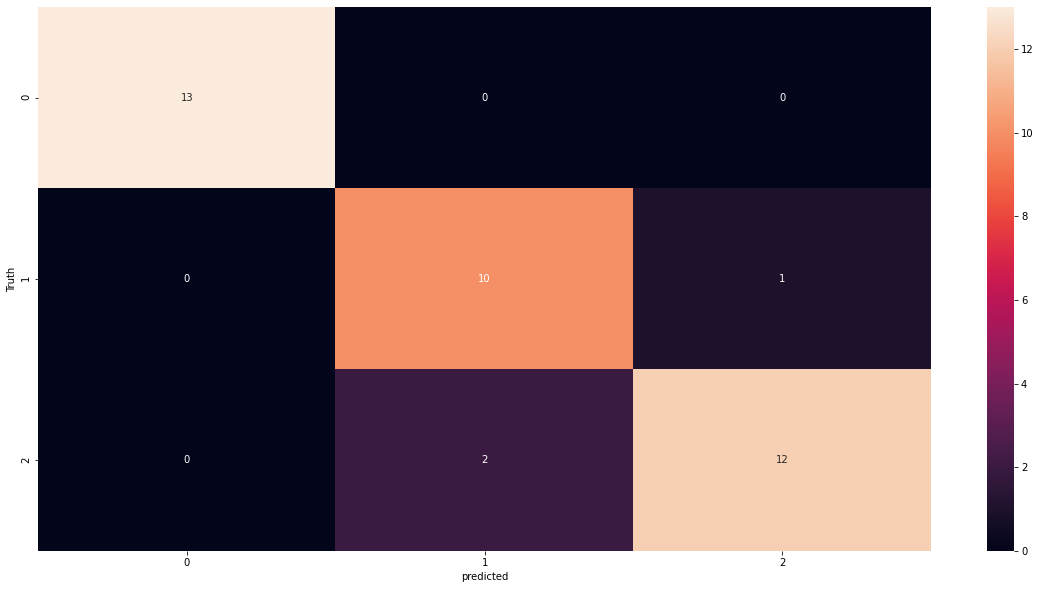

In [41]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,reg.predict(x_test)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.83      0.91      0.87        11
   Virginica       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

